
# Plotting Medical Images with Labels

This Jupyter Notebook contains code to read a text file containing the list of image filenames and their labels. 
It will then plot these images in a grid layout, sorted by their IDs.

**Note:** Please make sure that your text file and images directory are properly located before running the code.


In [9]:

# Import necessary libraries
import os
import matplotlib.pyplot as plt
import cv2


In [10]:
# Corrected function to read the text file and return sorted filenames and labels
def read_and_sort_text_file_with_patient_ids(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Extract filenames and labels considering the space within filenames
    filenames = [" ".join(line.split()[:-1]) for line in lines]
    labels = [line.split()[-1] for line in lines]

    # Extract IDs, sort filenames based on them, and extract patient IDs
    ids = []
    patient_ids = []
    for name in filenames:
        id_part = name[-13:]
        patient_id = id_part.split('p')[0]
        patient_ids.append(patient_id)
        
        try:
            image_id = int(id_part.split('.png')[0])
        except ValueError:
            image_id = -1
        
        ids.append(image_id)

    sorted_indices = sorted(range(len(ids)), key=lambda k: ids[k])
    sorted_filenames = [filenames[i] for i in sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]
    
    unique_patient_ids = list(set(patient_ids))

    return sorted_filenames, sorted_labels, unique_patient_ids


In [56]:
def plot_tumor_images_paginated_vertical(image_dir, filenames, labels, page=1):
    tumor_filenames = [f for f, l in zip(filenames, labels) if l == '1']
    
    # Extract image IDs for sorting using the provided method
    image_ids = []
    for f in tumor_filenames:
        id_part = f[-13:]
        try:
            image_id = int(id_part.split('.png')[0].split('p')[1])
        except ValueError:
            image_id = -1
        image_ids.append(image_id)
    
    sorted_indices = sorted(range(len(image_ids)), key=lambda k: image_ids[k])
    sorted_tumor_filenames = [tumor_filenames[i] for i in sorted_indices]
    sorted_image_ids = [image_ids[i] for i in sorted_indices]
    
    # Determine the start and end indices for pagination
    start_idx = (page - 1) * 4
    end_idx = start_idx + 4
    
    # Subset the filenames and image IDs for the current page
    page_filenames = sorted_tumor_filenames[start_idx:end_idx]
    page_image_ids = sorted_image_ids[start_idx:end_idx]
    
    # Plot images with one image per row
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    for i, (filename, image_id) in enumerate(zip(page_filenames, page_image_ids)):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(f"Image ID: {image_id}")
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

In [54]:
path = '/Users/marcel/Documents/Git-Master/JMU/Semester 3/Praktikum/medfm-challenge/data_anns/MedFMC/colon/colon_1-shot_train_exp2.txt'
image_dir = '/Users/marcel/Documents/Git-Master/JMU/Semester 3/Praktikum/medfm-challenge/data/MedFMC_train/colon/images'

In [49]:
filenames, labels, unique_patient_ids = read_and_sort_text_file_with_patient_ids(path)
print(unique_patient_ids)

['5396', '8025']


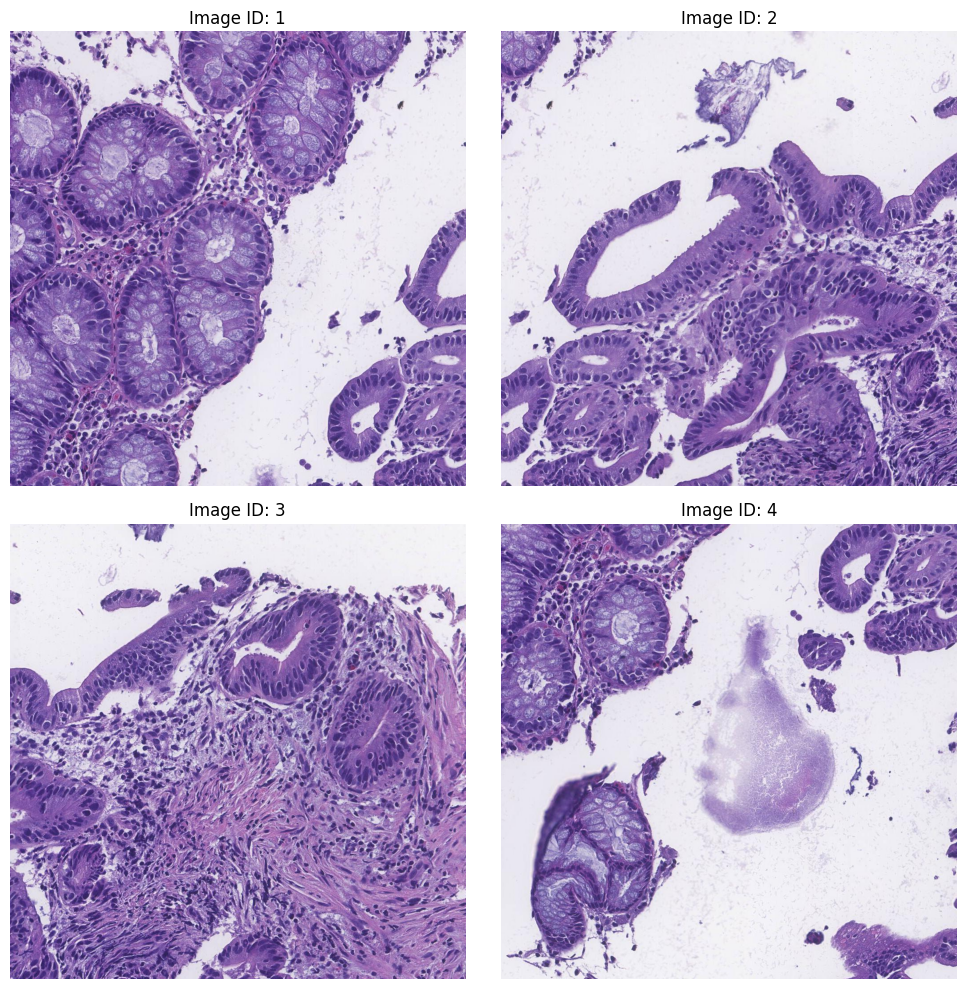

In [57]:
plot_tumor_images_paginated_vertical(image_dir, filenames, labels, page=1)